In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()

In [7]:
corr_with_target

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [8]:
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')

In [9]:
corr_with_target

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Name: MEDV, dtype: float64

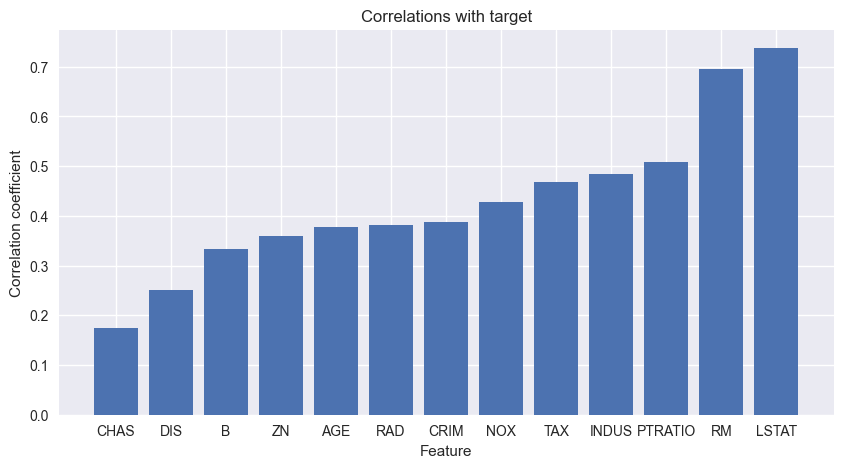

In [10]:
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

In [11]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # матрица целевых значений

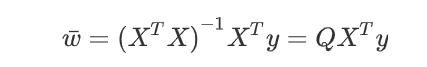

In [12]:
# np.linalg.inv - метод возвращает обратную матрицу (-1) в формуле

In [13]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Создаём вектор из единиц
    X = np.column_stack([ones, X]) #Добавляем вектор из единиц к таблице первым столбцом
    Q = np.linalg.inv(X.T @ X) # Вычисляем обратную матрицу Q
    w = Q @ X.T @ y
    return w #Вычисляем вектор коэффициентов

In [14]:
w = linear_regression(X, y)
w

array([34.55384088, -0.95004935])

In [15]:
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

w0: 34.55
w1: -0.95


In [16]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))

Predicted value: 29.63


In [17]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

In [18]:
y_predict = w[0] + w[1] * X #Делаем предсказание для всех объектов из таблицы

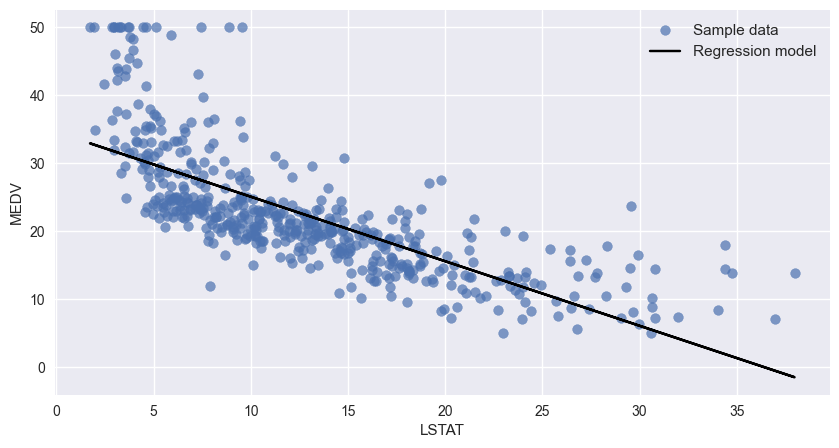

In [19]:
plot_regression_2d(X, y, y_predict) #Строим визуализацию

АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN

In [20]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()

In [21]:
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)

LinearRegression()

In [22]:
print('w0: {:.2f}'.format(lr_lstat.intercept_)) #свободный член w0

w0: 34.55


In [23]:
print('w1: {:.2f}'.format(lr_lstat.coef_[0])) #остальные параметры модели w1, w2, ..., wm, так как параметр один, то выбираем 1 значение списка

w1: -0.95


In [24]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)

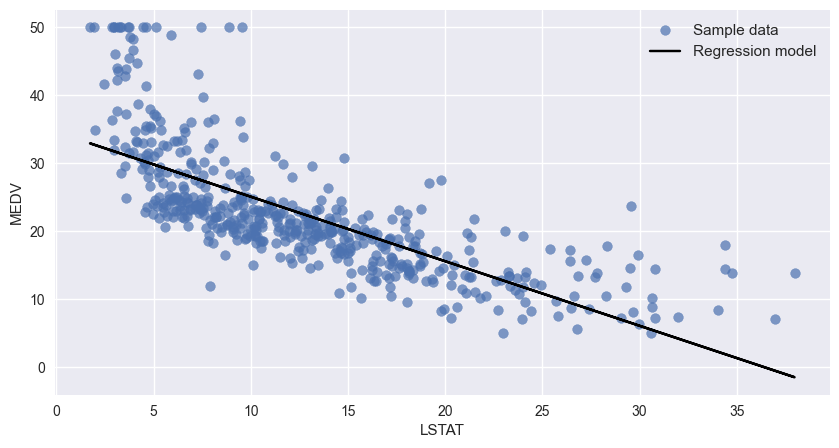

In [25]:
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Посчитаем модель для всех признаков

In [26]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns

In [27]:
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [28]:
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()

In [29]:
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [30]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})

In [31]:
display(w_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [32]:
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})

In [33]:
display(intercept_df)

,Features,Coefficients
0,INTERCEPT,36.459488


In [34]:
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)

In [35]:
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы с вами построили две модели линейной регрессии: lr_lstat на одном признаке (LSTAT) и lr_full — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

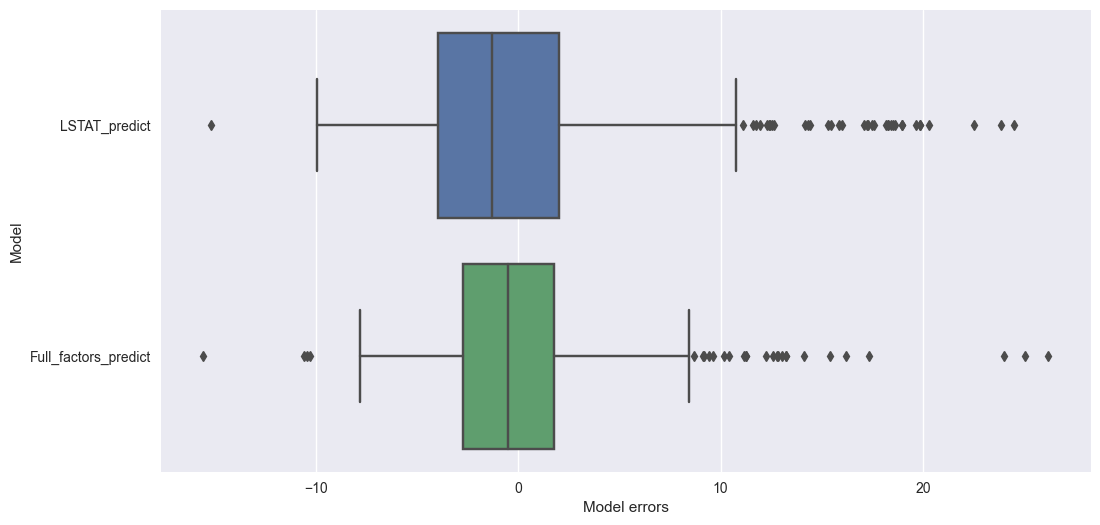

In [36]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])

#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    })

#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

In [37]:
test = [0.35114, 0.00000, 7.38000, 0.00000, 0.49300, 6.04100, 49.90000, 4.72110, 5.00000, 287.00000, 19.60000, 396.90000, 7.70000]

In [38]:
df_t = pd.DataFrame(data=test).T

In [39]:
df_t.columns = features

In [40]:
df_t

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


In [41]:
y_test = lr_full.predict(df_t)

In [42]:
y_test.round(2)

array([22.87])

In [43]:
df = pd.read_csv('data/50_Startups.csv')
display(df) 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
y_1 = df['Profit']
X_1 = df[['R&D Spend','Administration', 'Marketing Spend']]

In [45]:
lr_full.fit(X_1, y_1)

LinearRegression()

In [46]:
#Составляем таблицу из признаков и их коэффициентов
w_df_1 = pd.DataFrame({'Features': X_1.columns, 'Coefficients': lr_full .coef_})

In [47]:
w_df_1.round(2)

,Features,Coefficients
0,R&D Spend,0.81
1,Administration,-0.03
2,Marketing Spend,0.03
